In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-cars-dataset/2023 Car Dataset.csv


In [2]:
cars=pd.read_csv("/kaggle/input/2023-cars-dataset/2023 Car Dataset.csv")
cars

,Car Make,Car Model,Year,Body Type,Color Options,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Transmission Type,Acceleration (0-60 mph),Top Speed (mph),Mileage (MPG),Safety Features,Entertainment Features,Interior Features,Exterior Features,Price ($),Customer Ratings,Sales Figures (Units Sold)
0,Toyota,Camry,2022,Sedan,"White, Silver, Black",Gasoline,2.5,203,245,Automatic,7.9 seconds,135,31,"ABS, Airbags, Lane-Keeping Assist, Blind Spot...",8-inch Touchscreen Infotainment System,"Leather Seats, Power Driver's Seat, Dual-Zone...","LED Headlights, Alloy Wheels, Sunroof ...","28,500",4.5/5,"1,500"
1,Ford,F-150,2023,Truck,"Blue, Red, Gray",Gasoline,3.5,375,475,Automatic,6.1 seconds,145,23,"ABS, Airbags, Trailer Sway Control, Rear View...",12-inch SYNC 4 Infotainment System,"Cloth Seats, Power Windows, Keyless Entry ...","LED Taillights, Tow Hitch, Bed Liner ...","45,900",4.8/5,"2,200"
2,Honda,Civic,2023,Sedan,"Black, Blue, Silver",Gasoline,1.8,158,180,CVT,8.2 seconds,120,36,"ABS, Airbags, Lane Departure Warning, Rear Cr...",7-inch Display Audio System,"Cloth Seats, Bluetooth Connectivity, Push But...","LED Daytime Running Lights, Alloy Wheels ...","22,950",4.6/5,"2,800"
3,Chevrolet,Tahoe,2023,SUV,"Red, White, Gray",Gasoline,5.3,355,519,Automatic,7.1 seconds,130,19,"ABS, Airbags, Forward Collision Warning, Lane...",10.2-inch Infotainment System,"Leather Seats, Heated Front Seats, Third-Row ...","LED Headlights, Roof Rails, Power Liftgate ...","53,250",4.7/5,"1,000"
4,Tesla,Model 3,2023,Sedan,"Blue, Red, Silver",Electric,N/A,283 (est.),440 (est.),Automatic,5.2 seconds,140 (est.),125 (est.),"Enhanced Autopilot, Lane Departure Warning, A...",15.4-inch Infotainment Display,"Vegan Leather Seats, Heated Steering Wheel, P...","Panoramic Glass Roof, Power Trunk, Alloy Whee...","49,990",4.9/5,"4,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Nissan,Pathfinder,2023,SUV,"Black, White, Gray",Gasoline,3.5,284,259,Automatic,6.4 seconds,120,26,"ABS, Airbags, Intelligent Forward Collision W...",8-inch Touchscreen Display,"Cloth Seats, Keyless Entry, Tri-Zone Climate ...","LED Headlights, 18-inch Alloy Wheels ...","33,410",4.6/5,"1,600"
160,Volvo,XC60,2023,SUV,"Black, White, Silver",Gasoline,2,250,258,Automatic,6.4 seconds,140,26,"ABS, Airbags, City Safety Collision Avoidance...",9-inch Sensus Touchscreen,"Leather Seats, Keyless Entry, Panoramic Moonr...","LED Headlights, 19-inch Alloy Wheels ...","42,400",4.8/5,"1,800"
161,Subaru,Legacy,2023,Sedan,"Blue, White, Gray",Gasoline,2.4,182,176,CVT,8.9 seconds,130,35,"ABS, Airbags, EyeSight Driver Assist Technolo...",11.6-inch STARLINK Display,"Cloth Seats, Keyless Entry, Dual-Zone Climate...","LED Headlights, 17-inch Alloy Wheels ...","22,995",4.7/5,"1,500"
162,Acura,MDX,2023,SUV,"Black, White, Gray",Gasoline,3.5,290,267,Automatic,6.2 seconds,130,27,"ABS, Airbags, AcuraWatch, Multi-View Rear Cam...",12.3-inch True Touchpad Interface,"Leather Seats, Keyless Entry, Panoramic Moonr...","LED Headlights, 20-inch Alloy Wheels ...","46,900",4.7/5,"2,100"


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

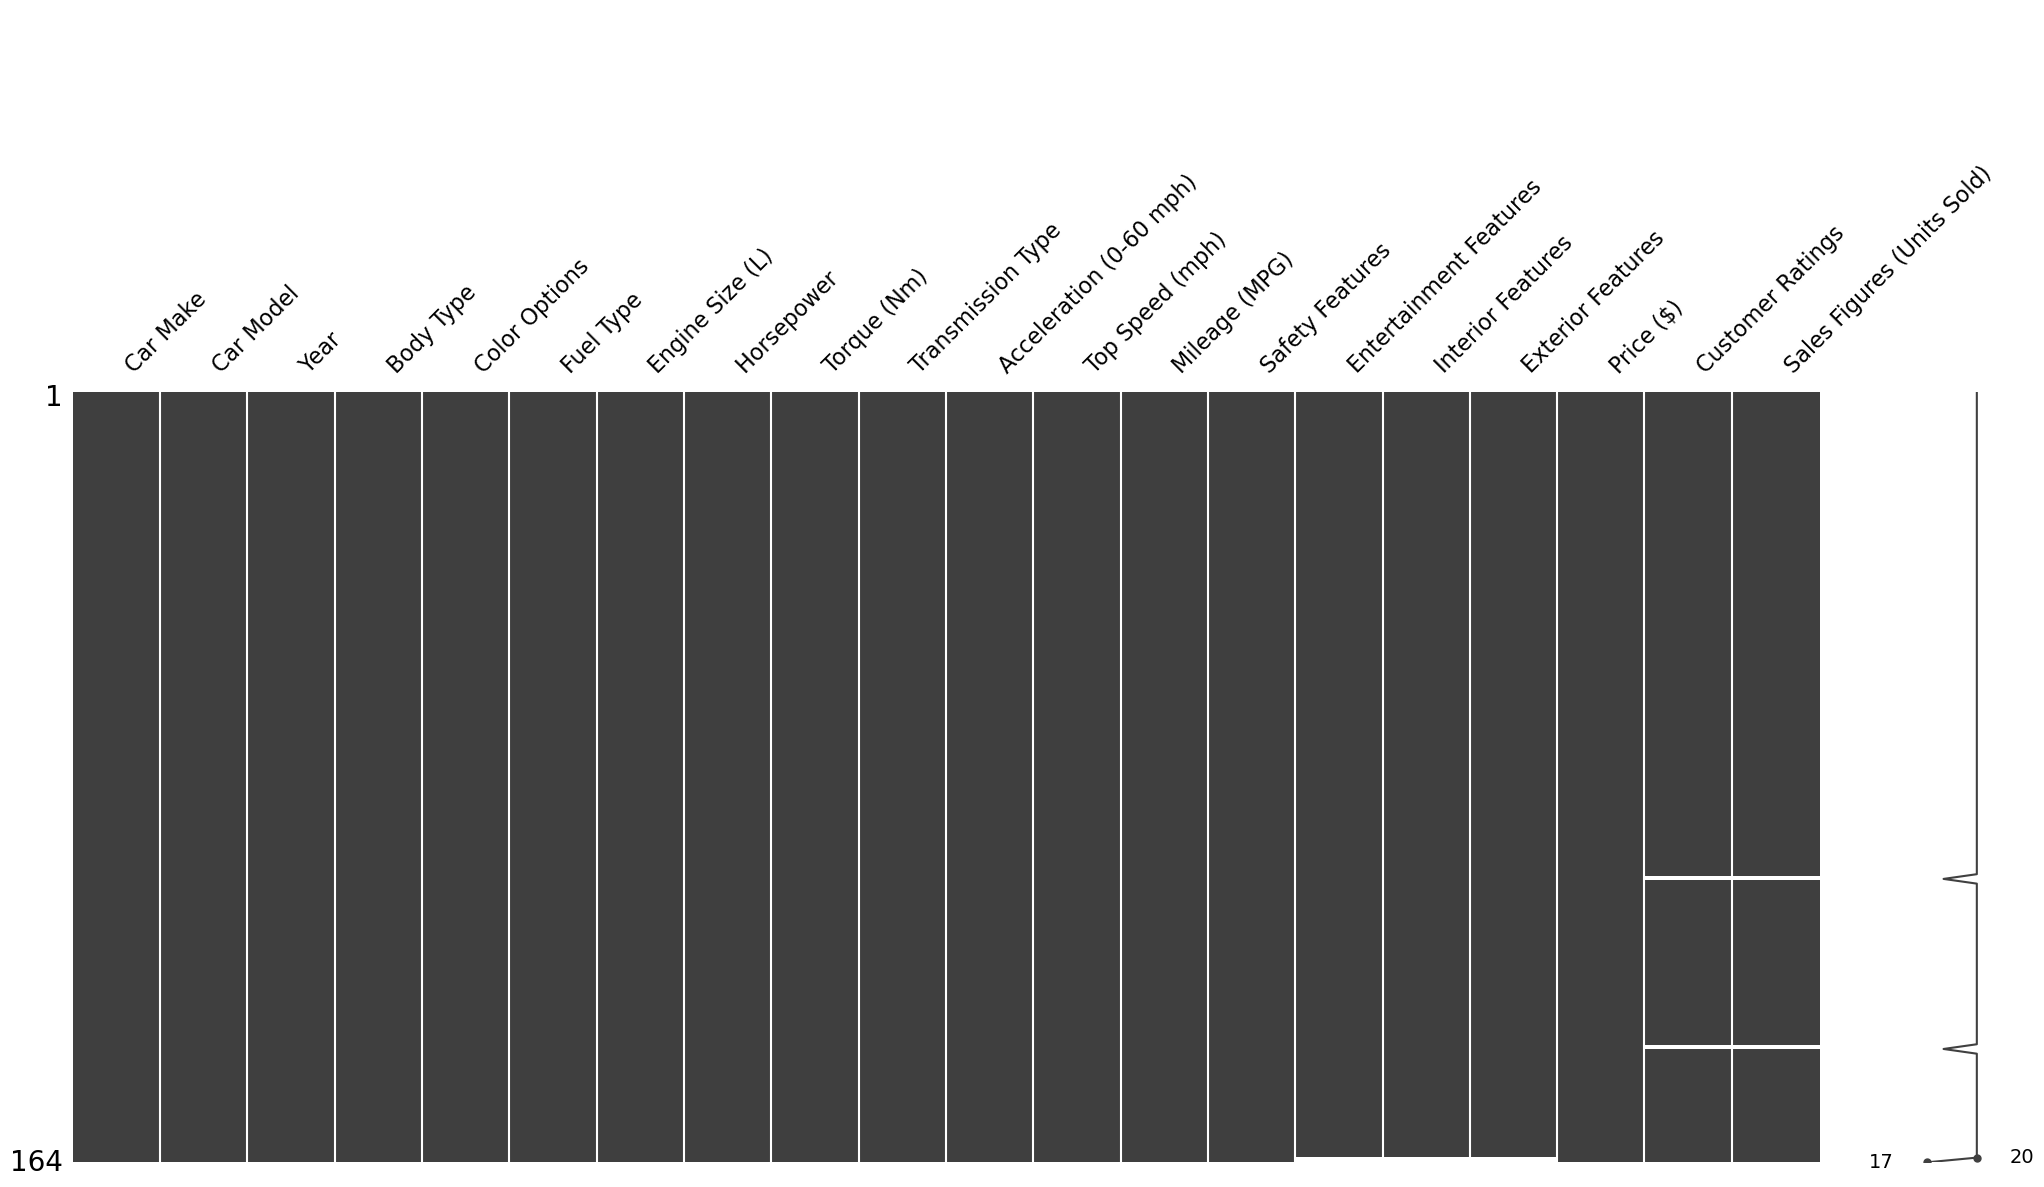

In [3]:
import missingno as msno   # checking for missing values
msno.matrix(cars)

# **Data Exploration**

In [4]:
# Display the dimensions (rows, columns) of the dataset
print("Dimensions of the dataset:", cars.shape)

# Display the first few rows of the dataset
print(cars.head())

Dimensions of the dataset: (164, 20)
    Car Make    Car Model      Year    Body Type   \
0   Toyota      Camry           2022   Sedan        
1   Ford        F-150           2023   Truck        
2   Honda       Civic           2023   Sedan        
3   Chevrolet   Tahoe           2023   SUV          
4   Tesla       Model 3         2023   Sedan        

    Color Options                    Fuel Type    Engine Size (L)   \
0   White, Silver, Black             Gasoline                  2.5   
1   Blue, Red, Gray                  Gasoline                  3.5   
2   Black, Blue, Silver              Gasoline                  1.8   
3   Red, White, Gray                 Gasoline                  5.3   
4   Blue, Red, Silver                Electric     N/A                

    Horsepower    Torque (Nm)    Transmission Type   Acceleration (0-60 mph)   \
0           203            245    Automatic            7.9 seconds              
1           375            475    Automatic            6.1 se

In [5]:
# Generate a summary of the numerical columns in the dataset
print(cars.describe())

             Year 
count   164.000000
mean   2022.987805
std       0.110092
min    2022.000000
25%    2023.000000
50%    2023.000000
75%    2023.000000
max    2023.000000


In [6]:
# Display data types of each column
print(cars.dtypes)


 Car Make                                                        object
 Car Model                                                       object
 Year                                                             int64
 Body Type                                                       object
 Color Options                                                   object
 Fuel Type                                                       object
 Engine Size (L)                                                 object
 Horsepower                                                      object
 Torque (Nm)                                                     object
 Transmission Type                                               object
 Acceleration (0-60 mph)                                         object
 Top Speed (mph)                                                 object
 Mileage (MPG)                                                   object
 Safety Features                                                

In [7]:
# Check for missing values in each column
print(cars.isnull().sum())


 Car Make                                                        0
 Car Model                                                       0
 Year                                                            0
 Body Type                                                       0
 Color Options                                                   0
 Fuel Type                                                       0
 Engine Size (L)                                                 0
 Horsepower                                                      0
 Torque (Nm)                                                     0
 Transmission Type                                               0
 Acceleration (0-60 mph)                                         0
 Top Speed (mph)                                                 0
 Mileage (MPG)                                                   0
 Safety Features                                                 0
 Entertainment Features                                       

In [8]:
cars

,Car Make,Car Model,Year,Body Type,Color Options,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Transmission Type,Acceleration (0-60 mph),Top Speed (mph),Mileage (MPG),Safety Features,Entertainment Features,Interior Features,Exterior Features,Price ($),Customer Ratings,Sales Figures (Units Sold)
0,Toyota,Camry,2022,Sedan,"White, Silver, Black",Gasoline,2.5,203,245,Automatic,7.9 seconds,135,31,"ABS, Airbags, Lane-Keeping Assist, Blind Spot...",8-inch Touchscreen Infotainment System,"Leather Seats, Power Driver's Seat, Dual-Zone...","LED Headlights, Alloy Wheels, Sunroof ...","28,500",4.5/5,"1,500"
1,Ford,F-150,2023,Truck,"Blue, Red, Gray",Gasoline,3.5,375,475,Automatic,6.1 seconds,145,23,"ABS, Airbags, Trailer Sway Control, Rear View...",12-inch SYNC 4 Infotainment System,"Cloth Seats, Power Windows, Keyless Entry ...","LED Taillights, Tow Hitch, Bed Liner ...","45,900",4.8/5,"2,200"
2,Honda,Civic,2023,Sedan,"Black, Blue, Silver",Gasoline,1.8,158,180,CVT,8.2 seconds,120,36,"ABS, Airbags, Lane Departure Warning, Rear Cr...",7-inch Display Audio System,"Cloth Seats, Bluetooth Connectivity, Push But...","LED Daytime Running Lights, Alloy Wheels ...","22,950",4.6/5,"2,800"
3,Chevrolet,Tahoe,2023,SUV,"Red, White, Gray",Gasoline,5.3,355,519,Automatic,7.1 seconds,130,19,"ABS, Airbags, Forward Collision Warning, Lane...",10.2-inch Infotainment System,"Leather Seats, Heated Front Seats, Third-Row ...","LED Headlights, Roof Rails, Power Liftgate ...","53,250",4.7/5,"1,000"
4,Tesla,Model 3,2023,Sedan,"Blue, Red, Silver",Electric,N/A,283 (est.),440 (est.),Automatic,5.2 seconds,140 (est.),125 (est.),"Enhanced Autopilot, Lane Departure Warning, A...",15.4-inch Infotainment Display,"Vegan Leather Seats, Heated Steering Wheel, P...","Panoramic Glass Roof, Power Trunk, Alloy Whee...","49,990",4.9/5,"4,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Nissan,Pathfinder,2023,SUV,"Black, White, Gray",Gasoline,3.5,284,259,Automatic,6.4 seconds,120,26,"ABS, Airbags, Intelligent Forward Collision W...",8-inch Touchscreen Display,"Cloth Seats, Keyless Entry, Tri-Zone Climate ...","LED Headlights, 18-inch Alloy Wheels ...","33,410",4.6/5,"1,600"
160,Volvo,XC60,2023,SUV,"Black, White, Silver",Gasoline,2,250,258,Automatic,6.4 seconds,140,26,"ABS, Airbags, City Safety Collision Avoidance...",9-inch Sensus Touchscreen,"Leather Seats, Keyless Entry, Panoramic Moonr...","LED Headlights, 19-inch Alloy Wheels ...","42,400",4.8/5,"1,800"
161,Subaru,Legacy,2023,Sedan,"Blue, White, Gray",Gasoline,2.4,182,176,CVT,8.9 seconds,130,35,"ABS, Airbags, EyeSight Driver Assist Technolo...",11.6-inch STARLINK Display,"Cloth Seats, Keyless Entry, Dual-Zone Climate...","LED Headlights, 17-inch Alloy Wheels ...","22,995",4.7/5,"1,500"
162,Acura,MDX,2023,SUV,"Black, White, Gray",Gasoline,3.5,290,267,Automatic,6.2 seconds,130,27,"ABS, Airbags, AcuraWatch, Multi-View Rear Cam...",12.3-inch True Touchpad Interface,"Leather Seats, Keyless Entry, Panoramic Moonr...","LED Headlights, 20-inch Alloy Wheels ...","46,900",4.7/5,"2,100"


In [9]:
# Display column names in the dataset
print(cars.columns)


Index([' Car Make ', ' Car Model   ', ' Year ', ' Body Type ',
       ' Color Options                 ', ' Fuel Type ', ' Engine Size (L) ',
       ' Horsepower ', ' Torque (Nm) ', ' Transmission Type ',
       ' Acceleration (0-60 mph) ', ' Top Speed (mph) ', ' Mileage (MPG) ',
       ' Safety Features                                      ',
       ' Entertainment Features               ',
       ' Interior Features                                ',
       ' Exterior Features                                           ',
       ' Price ($) ', ' Customer Ratings ', ' Sales Figures (Units Sold) '],
      dtype='object')


In [10]:
# Data Overview
print("Dimensions of the dataset:", cars.shape)
print(cars.head())



Dimensions of the dataset: (164, 20)
    Car Make    Car Model      Year    Body Type   \
0   Toyota      Camry           2022   Sedan        
1   Ford        F-150           2023   Truck        
2   Honda       Civic           2023   Sedan        
3   Chevrolet   Tahoe           2023   SUV          
4   Tesla       Model 3         2023   Sedan        

    Color Options                    Fuel Type    Engine Size (L)   \
0   White, Silver, Black             Gasoline                  2.5   
1   Blue, Red, Gray                  Gasoline                  3.5   
2   Black, Blue, Silver              Gasoline                  1.8   
3   Red, White, Gray                 Gasoline                  5.3   
4   Blue, Red, Silver                Electric     N/A                

    Horsepower    Torque (Nm)    Transmission Type   Acceleration (0-60 mph)   \
0           203            245    Automatic            7.9 seconds              
1           375            475    Automatic            6.1 se

In [11]:
# Data Summary
print(cars.describe())



             Year 
count   164.000000
mean   2022.987805
std       0.110092
min    2022.000000
25%    2023.000000
50%    2023.000000
75%    2023.000000
max    2023.000000


In [12]:
# Data Types
print(cars.dtypes)



 Car Make                                                        object
 Car Model                                                       object
 Year                                                             int64
 Body Type                                                       object
 Color Options                                                   object
 Fuel Type                                                       object
 Engine Size (L)                                                 object
 Horsepower                                                      object
 Torque (Nm)                                                     object
 Transmission Type                                               object
 Acceleration (0-60 mph)                                         object
 Top Speed (mph)                                                 object
 Mileage (MPG)                                                   object
 Safety Features                                                

In [13]:
# Missing Values
print(cars.isnull().sum())

 Car Make                                                        0
 Car Model                                                       0
 Year                                                            0
 Body Type                                                       0
 Color Options                                                   0
 Fuel Type                                                       0
 Engine Size (L)                                                 0
 Horsepower                                                      0
 Torque (Nm)                                                     0
 Transmission Type                                               0
 Acceleration (0-60 mph)                                         0
 Top Speed (mph)                                                 0
 Mileage (MPG)                                                   0
 Safety Features                                                 0
 Entertainment Features                                       

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Categorical Variables
print("Body Types:", cars[' Body Type '].unique())
print("Color Options:", cars[' Color Options                 '].unique())
print("Fuel Types:", cars[' Fuel Type '].unique())
print("Transmission Types:", cars[' Transmission Type '].unique())







Body Types: [' Sedan     ' ' Truck     ' ' SUV       ' ' Coupe     ' ' Wagon     '
 ' SUV    ' ' SUV      ' ' Minivan   ' ' Hatchback ' ' Convertible ']
Color Options: [' White, Silver, Black          ' ' Blue, Red, Gray               '
 ' Black, Blue, Silver           ' ' Red, White, Gray              '
 ' Blue, Red, Silver             ' ' Green, Black, White           '
 ' Black, Gray, Blue             ' ' Red, Silver, White            '
 ' Yellow, Black, Red            ' ' Blue, Silver, Green           '
 ' White, Gray, Black            ' ' Red, Black, White             '
 ' Gray, Blue, Silver            ' ' Green, Black, Gray            '
 ' Red, Black, Yellow            ' ' Blue, White, Gray             '
 ' Red, Silver, Black            ' ' Silver, Black, Blue           '
 ' Black, Blue, White            ' ' Gray, Green, Red              '
 ' White, Black, Silver          ' ' Silver, White, Gray           '
 ' Black, Red, Blue              ' ' Red, Black, Gray              '
 ' B

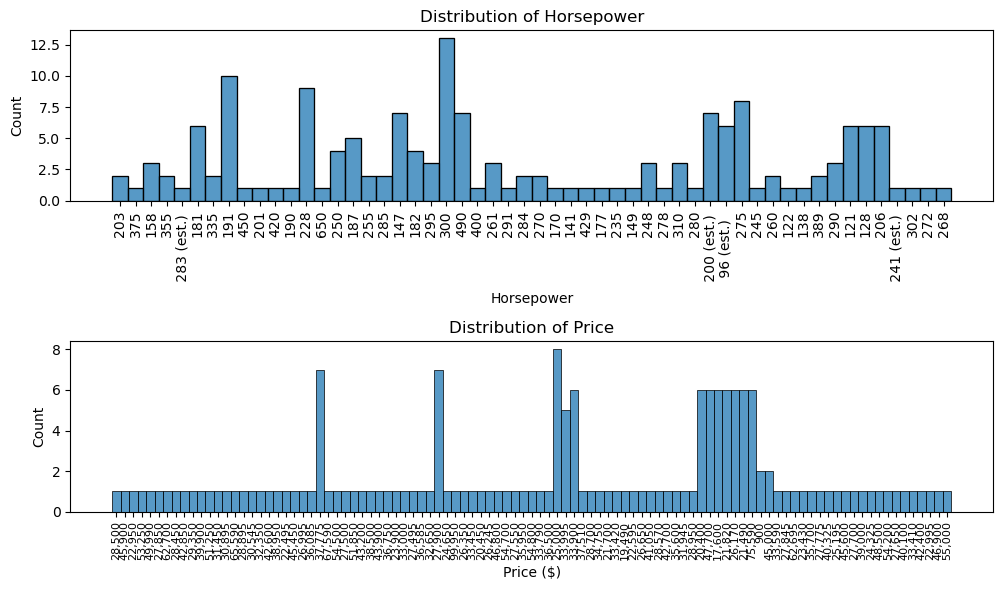

In [15]:
# Distribution Analysis: Horsepower and Price
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
sns.histplot(cars[' Horsepower '], bins=20)
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

plt.subplot(2, 1, 2)
sns.histplot(cars[' Price ($) '], bins=20)
plt.title('Distribution of Price')
plt.xlabel('Price ($)')
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels by 90 degrees and adjust fontsize

plt.tight_layout()
plt.show()




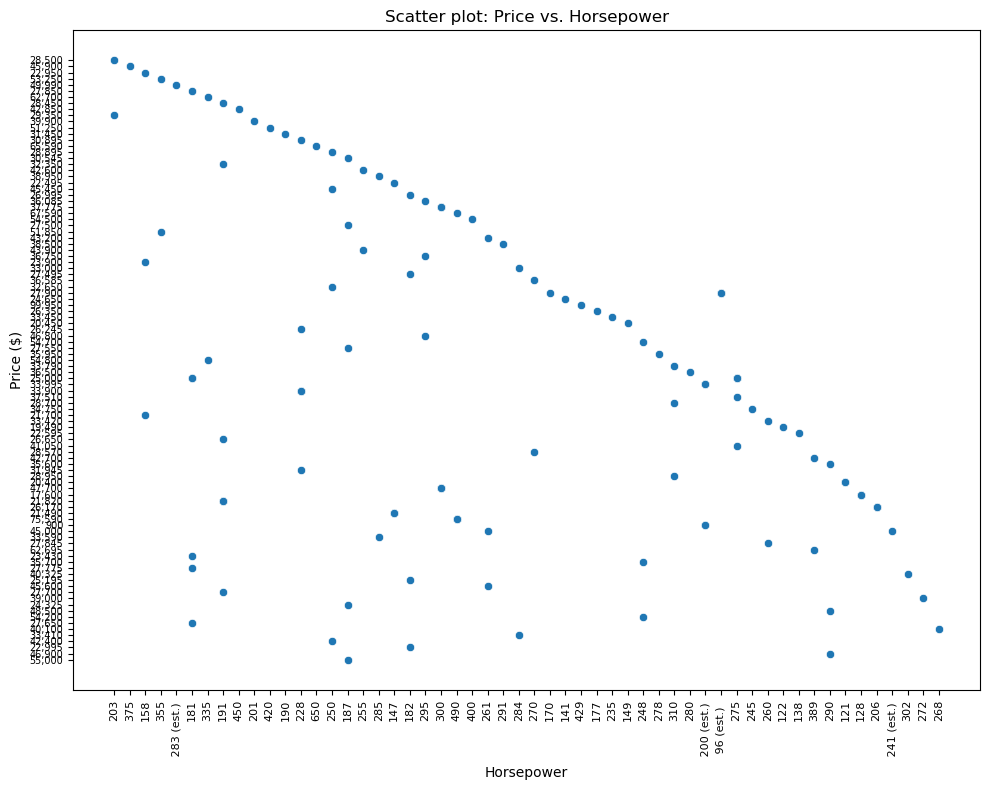

In [16]:
# Scatter plot: Price vs. Horsepower
plt.figure(figsize=(10, 8))
sns.scatterplot(x=' Horsepower ', y=' Price ($) ', data=cars)
plt.title('Scatter plot: Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price ($)')
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels by 90 degrees and adjust fontsize
plt.yticks(fontsize=7)  # Adjust fontsize for y-axis labels
plt.tight_layout()
plt.show()